In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error#removing space
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('COVID_19_Datasets')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df.drop('Mortality_Rate',axis=1,inplace=True)

In [4]:
df.shape

(58, 17)

In [5]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

In [6]:
df['Recovered']=df['Recovered'].fillna((df['Recovered'].median()))

In [7]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,3008.0,12530.0,1,266.194321,164450.0,1493.0,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,3008.0,0.0,60,0.000000,124.0,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,84000005,USA,3189.670370,10.693584


In [8]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,58.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,5904.137931,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,10064.152778,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,1281.750000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,8.410000e+07,11377.424693,28.054438


In [9]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [10]:
df.isna().any()

Province_State          False
Country_Region          False
Last_Update             False
Lat                      True
Long_                    True
Confirmed               False
Deaths                  False
Recovered               False
Active                  False
FIPS                    False
Incident_Rate            True
People_Tested            True
People_Hospitalized      True
UID                     False
ISO3                    False
Testing_Rate             True
Hospitalization_Rate     True
dtype: bool

In [11]:
df.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  UID                   58 non-null     int64  
 14  ISO3                  58 non-null     object 
 15  Testing_Rate          56 

In [13]:
df.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120959,0.120024,0.063820,0.120148,-0.374943,0.245693,0.084769,0.065030,0.774106,0.309579,-0.162856
Long_,-0.278274,1.000000,0.009998,0.028772,-0.021756,0.011654,0.367911,0.041318,-0.077781,0.280909,-0.526908,0.190191,0.251661
Confirmed,0.120959,0.009998,1.000000,0.982191,0.793441,0.985218,-0.096696,0.711776,0.828022,0.989936,0.153972,0.334032,0.327376
Deaths,0.120024,0.028772,0.982191,1.000000,0.811694,0.954378,-0.075053,0.712117,0.741730,0.992313,0.120043,0.345441,0.325817
Recovered,0.063820,-0.021756,0.793441,0.811694,1.000000,0.680043,-0.054757,0.535803,0.651918,0.948124,0.143449,0.252104,0.279105
Active,0.120148,0.011654,0.985218,0.954378,0.680043,1.000000,-0.092276,0.703931,0.829687,0.976456,0.146354,0.322773,0.332398
FIPS,-0.374943,0.367911,-0.096696,-0.075053,-0.054757,-0.092276,1.000000,-0.220264,-0.194011,0.013433,0.058022,-0.092705,-0.172665
Incident_Rate,0.245693,0.041318,0.711776,0.712117,0.535803,0.703931,-0.220264,1.000000,0.441669,0.725370,0.264768,0.620621,0.258029
People_Tested,0.084769,-0.077781,0.828022,0.741730,0.651918,0.829687,-0.194011,0.441669,1.000000,0.906210,0.236043,0.230753,0.356618
People_Hospitalized,0.065030,0.280909,0.989936,0.992313,0.948124,0.976456,0.013433,0.725370,0.906210,1.000000,0.013433,0.331753,0.377586


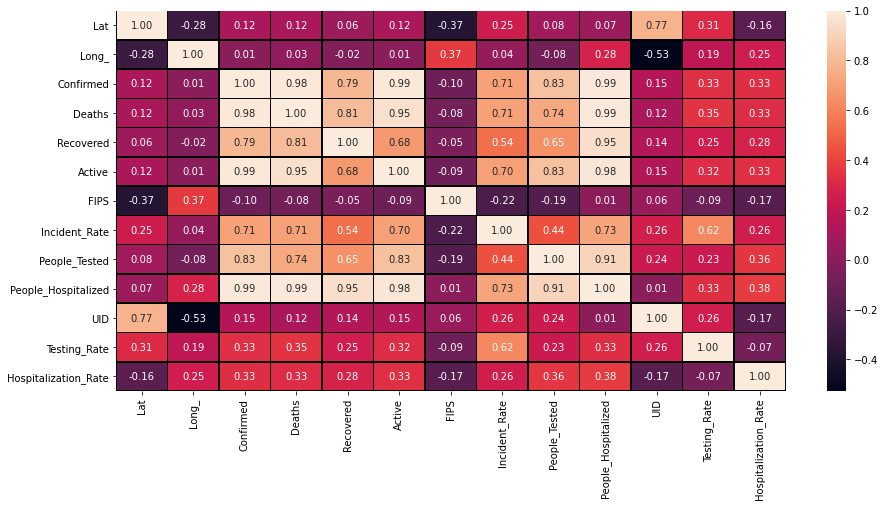

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

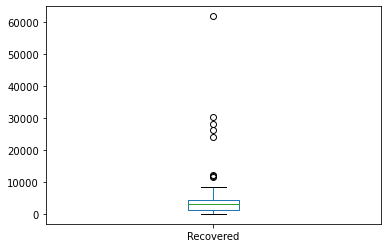

In [15]:
df['Recovered'].plot.box()

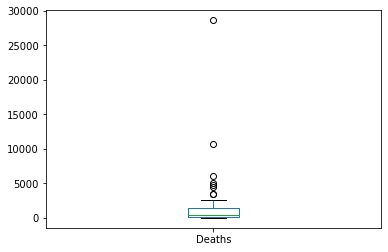

In [16]:
df['Deaths'].plot.box()

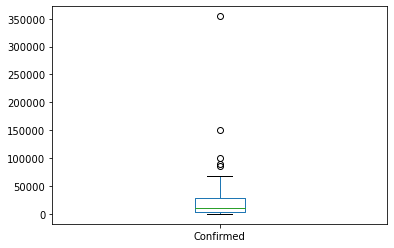

In [17]:
df['Confirmed'].plot.box()

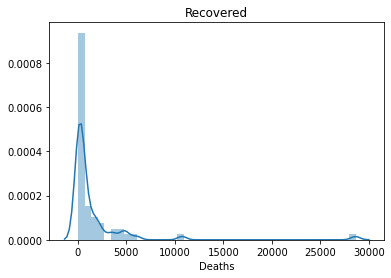

In [18]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


sn.distplot(df['Deaths'])
plt.title("Recovered")
plt.show()


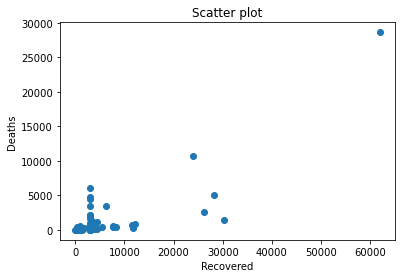

In [19]:
plt.scatter(df["Recovered"],df["Deaths"])
plt.title("Scatter plot")
plt.xlabel("Recovered")
plt.ylabel("Deaths")
plt.show()

In [20]:
df=pd.DataFrame(data=df)
print(df)
sb.pairplot(df)

              Province_State Country_Region          Last_Update      Lat  \
0                    Alabama             US  2020-05-21 02:32:54  32.3182   
1                     Alaska             US  2020-05-21 02:32:54  61.3707   
2             American Samoa             US  2020-05-21 02:32:54 -14.2710   
3                    Arizona             US  2020-05-21 02:32:54  33.7298   
4                   Arkansas             US  2020-05-21 02:32:54  34.9697   
5                 California             US  2020-05-21 02:32:54  36.1162   
6                   Colorado             US  2020-05-21 02:32:54  39.0598   
7                Connecticut             US  2020-05-21 02:32:54  41.5978   
8                   Delaware             US  2020-05-21 02:32:54  39.3185   
9           Diamond Princess             US  2020-05-21 02:32:54      NaN   
10      District of Columbia             US  2020-05-21 02:32:54  38.8974   
11                   Florida             US  2020-05-21 02:32:54  27.7663   

NameError: name 'sb' is not defined

In [21]:
df.drop('Lat',axis=1,inplace=True)

In [22]:
df.describe()

,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,58.000000,58.000000,58.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,5.800000e+01,56.000000,33.000000
mean,-85.206614,26756.086207,1611.017241,5904.137931,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,7.676194e+07,3894.186870,14.342541
std,49.754449,52562.031122,4084.750891,10064.152778,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.378302e+07,1933.169297,5.047403
min,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,1.600000e+01,97.702058,6.778043
25%,-101.165775,2596.000000,74.000000,1281.750000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,8.400001e+07,2712.800274,10.000000
50%,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,8.400003e+07,3469.782532,13.598326
75%,-76.970625,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,8.400004e+07,4763.649736,17.658649
max,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,8.410000e+07,11377.424693,28.054438


In [23]:
df.shape

(58, 16)